# Vergleich des Mittelwertes (oder eines anderen Parameters) zweier verbundener Stichproben 

In [2]:
# Wir führen wie immer das folgende aus, damit wir alle Module zur Verfügung haben.
# Außerdem erzeugen wir einen Wert, den wir als Mittelwert einer Verteilung benutzen werden.

# numpy mit allen Untermodulen importieren
import numpy as np
from scipy import stats as sps
# Matplotlib Untermodul pyplot importieren
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
# Plotten innerhalb des Notebooks aktivieren:
%matplotlib inline

## Lernziel
Wir wollen heute lernen, eine Entscheidung zu treffen, ob die Mittelwerte (und andere Parameter) zweier Verteilungen gleich sind. Dabei sind die Stichproben, die wir aus beiden Verteilungen Erhalten gepaart, d.h. zu jedem Ergebnis in einer Stichprobe gehört ganz genau ein bestimmtes Ergebnis in einer anderen Stichprobe.

Unser Beispiel heute ist eine Gruppe von Spacats, die zur Erde gebracht wurden, dort aber in Käfighaltung ständig Schnupfen bekommen - wobei sie diesen auch von selbst nach einer gewissen Zeit loswerden.  Leider kehrt dieser Schnupfen häufig wieder und dann haben die Tiere keine Lust, unsere Verhaltensts mit zu machen.

Wir haben nun ein experimentelles Medikament zur Verfügung, welches angeblich die Dauer der Erkrankung verrringert.

In unserer Studie dazu haben wir erkrankten Spacats jeweils einmal das Medikament und einmal das Placebo gegeben. D.h. jedem Ergebnis für eine bestimmte Spacat mit Placebo steht genau ein Ergebnis in derselben Spacat mit dem echten Medikament gegenüber. Wir haben also zwei gepaarte Stichproben.

Hier sind die Ergebnisse für unser Experiment mit 16 Spacats, die je einmal Medizin und einmal Placcebo erhalten:

Genesungsdauer mit Medizin: `[1, 2, 3, 5, 4, 3, 2, 9.9, 1, 2, 3, 5, 4, 3, 2, 5]`

Genesungsdauer mit Placebo: `[0.9, 2.1, 3.2, 5.1, 4, 3.1, 2, 10.1, 1, 2, 3.1, 5.1, 4.1, 3, 2, 5]`

Die Daten sind dabei so sortiert, dass der erste Wert in beiden Listen zur ersten Spacat gehört, der zweite Wert in beiden Listen zur zweiten Spacat, etc.


In [3]:
# AUFGABE: Oben haben wir zwar zwei Listen mit Werten,
# aber wir könne diese in Python noch nicht benutzen, 
# da sie noch keinen Variablennamen haben.
# Erzeugen Sie zwei numpy arrays mit diesen Werten mit den Namen:
# d_medizin
# d_placebo

# Wir erstellen zwei np.array Objekte mit der np.array() Methode
d_medizin = np.array([1, 2, 3, 5, 4, 3, 2, 9.9, 1, 2, 3, 5, 4, 3, 2, 5]) # Stichprobe Medizin
d_placebo = np.array([0.9, 2.1, 3.2, 5.1, 4, 3.1, 2, 10.1, 1, 2, 3.1, 5.1, 4.1, 3, 2, 5]) # Stichprobe Placebo

**Wichtiger Hinweis**: Stellen Sie sicher, dass Sie die nächste Aufgabe korrekt erledigen, da wir diese Variablen weiter unten brauchen!

Wir berechnen nun mal die Differenz der Mittelwerte der originalen Stichproben und merken usn diese in einer Variablen (weil wir sie später noch brauchen).

In [4]:
orig_diff_mittel = np.mean(d_medizin - d_placebo)
print(orig_diff_mittel)

-0.05624999999999992


Dieses Ergebnis bedeutet, daß in unserer Stichprobe von 16 Spacats, die mittlere Genesungsdauer mit Medizin etwa 0.21 Tage kürzer ist.

Für das Verständnis des unten dargestellten Tests und des Unterschiedes zu den Tests für ungepaaerte Stichproben ist es gut, unsere Daten mal auf folgende Weise zu Plotten:

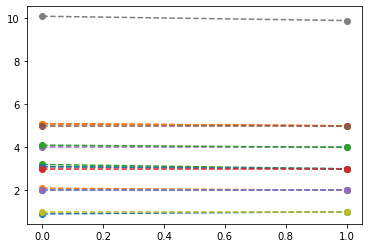

In [9]:
plt.figure()
for spacat in range(0,np.size(d_medizin)):
    x = [0,1]
    y = [ d_placebo[spacat],d_medizin[spacat]]
    # Der nächste Befehl plottet eine Linie
    # zwischen den beiden Werten für eine Spacat
    # ohne (links) und mit Medizin (rechts). 
    # übrigens: das '--o' heisst gestrichelte Linie (--)
    # mit zuätzlichen Punkten (o), dort wo die DAten sind.
    plt.plot(x,y, '--o' )                

Jede gestrichelte farbige Linie verbindet hier die **beiden Meßwerte, die wir von einer Spacat** erhalten haben. Die Werte mit Placebo sind links bei 0 aufgetragen ("0 Medizin"), die mit Medizin rechts bei 1.

**AUFGABE: Überlegen Sie sich, ob Sie auch die Daten aus Übung 7 so plotten können? Begründen Sie ihre Antwort.**


**AUFGABE: Enthält der Plot auch Linien, die von links nach rechts abfallen? Wenn ja, wie viele? Was bedeutet das für die Wirksamkeit der Medizin?**

In [7]:
abfallend = 0
for x in range(0, np.size(d_medizin)):
    if d_medizin[x] <= d_placebo[x]:
        abfallend += 1
print(abfallend)

15


### Simulation der Nullhypothese für gepaarte Stichproben
Wir formulieren unsere Nullhypothese so: Die Verteilungen für die Genesungszeiten für Spacats sind mit und ohne Medizin gleich. Daher sind die einzelnen Werte der Stichproben einfach **austauschbar - allerdings nur innerhalb einer Spacat (einer 'unit of observation')**. Diese Einschränkung ist damit begründet, daß manche Tiere einfach robuster sind als andere und daher sowieso viel schneller gesund werden, egal ob mit oder ohne Medizin. Diese dürfen wir nicht einfach austauschen!!

Wir können daher neue mögliche Ergebnisse simulieren, die mit der Nullhypothese im Einklang sind, indem wir Werte zwischen den Stichproben **in der erlaubten Weise** austauschen und erneut die Größe berechnen, die uns interessiert (hier ist das die Differenz der Stichproben-Mittelwerte).

Wenn wir das oft machen, dann bekommen wir eine Verteilung von Werten (hier Differenzen der simulierten Stichproben-Mittelwerte), wie wir sie erwarten, wenn die Nullhypothese war wäre.

##### Austauschen von Werten zwischen Stichproben:
Wir wollen völlig Werte in erlaubter Weise zwischen gepaarten Stichproben austauschen.

Dazu machen wir folgende Schritte:
1. Für jedes Ergebnis-Paar in unserer Stichprobe entscheiden wir zufällig, ob wir es austauschen oder nicht, dazu ziehen wir zufällig eine 0 oder 1 für jedes Paar;
2. Haben wir für ein Paar eine Null gezogen, so bleibt alles, wie es ist, ziehen wir eine 1 so tauschen wir.
3. Nach dem Tauschen rechnen wir erneut den Parameter aus, der uns interessiert (hier Differenz der Stichprobenmittelwerte)

In [13]:
# 1. wir ziehen eine 0 oder 1 für jedes Paar
# (Anmerkung: Sie sollten vorher gecheckt haben, ob beide Datensätze wirklich gleich viele Einträge haben)
anz_paare = np.size(d_medizin)
tauschen = np.random.randint(0,2,anz_paare)
print(tauschen)

[1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1]


In [14]:
# ACHTUNG: Wir machen noch eine echte (!) Kopien von den Daten, um die Originale nicht zu zerstören!
sim_d_medizin = d_medizin.copy()
sim_d_placebo = d_placebo.copy()     
    

In [15]:
for pair_index in range(0,anz_paare):
    if tauschen[pair_index] == 1:
        print('tausche Paar:')
        print(pair_index)
        a = sim_d_medizin[pair_index]
        b = sim_d_placebo[pair_index]
        sim_d_medizin[pair_index] = b
        sim_d_placebo[pair_index] = a
        # das ginge in Python auch kürzer zu schreiben, ist aber dann vlt. für manche verwirrend
        # sim_d_medizin[pair_index], sim_d_placebo[pair_index] = sim_d_placebo[pair_index], sim_d_medizin[pair_index]


tausche Paar:
0
tausche Paar:
2
tausche Paar:
3
tausche Paar:
4
tausche Paar:
5
tausche Paar:
10
tausche Paar:
15


Wir haben jetzt zwei neue, simulierte Stichproben, weiterhin gepaart, diese sind unter der Nullhypothese genauso 'gut' wie das Original. Aus ihnen können wir den uns interssierenden Paramter neu berechnen.

In [16]:
# 3. ... neue Wert des Parameters berechnen:
sim_diff_mittel = np.mean(sim_d_medizin - sim_d_placebo)
print(sim_diff_mittel)

-0.006249999999999915


Wir definieren jetzt einen neuen Befehl, der für uns das obige mehrfach macht, um so eine Verteilung der simulierten Mittelwertdifferenzen zu bekommen:

In [18]:
# Alle vorkommenden Befehle haben Sie oben schon gesehen
def simuliere_verteilung_gepaart_diff(stichprobe_1, stichprobe_2, anz_permutationen):
    diff_orig = np.mean(stichprobe_1 - stichprobe_2)
    verteilung_diff_sim = np.full(anz_permutationen+1, np.nan) # ein Element mehr für den originalen Wert (!)
    anz_paare = np.size(stichprobe_1)
    
    for perm in range(0, anz_permutationen):
        tauschen = np.random.randint(0,2,anz_paare)
        sim_stichprobe_1 = stichprobe_1.copy()
        sim_stichprobe_2 = stichprobe_2.copy()  
        
        for pair_index in range(0,anz_paare):
            if tauschen[pair_index] == 1:
                #print('tausche Paar:')
                #print(pair_index)
                a = sim_stichprobe_1[pair_index]
                b = sim_stichprobe_2[pair_index]
                sim_stichprobe_1[pair_index] = b
                sim_stichprobe_2[pair_index] = a
        # wir sind mit tauschen fertig
        sim_diff_mittel = np.mean(sim_stichprobe_1 - sim_stichprobe_2)   
        # neue simulierte Differenz speichern nicht vergessen:
        verteilung_diff_sim[perm] = sim_diff_mittel 
    verteilung_diff_sim[perm+1] = diff_orig
    return verteilung_diff_sim
     
        
        

In [ ]:
# Aufgabe Wir simulieren Sie mit obigem Befehl jetzt die Verteilung der Mittelwertdifferenzen,
# die wir erwarten würden (müssen), wenn die Nullhypothese wahr wäre:

In [19]:
null_vert_sim =  simuliere_verteilung_gepaart_diff(d_medizin, d_placebo, 3000)

Und plotten diese zusammen mit einer Linie, welche die originale, beobachtete, Differenz angibt:

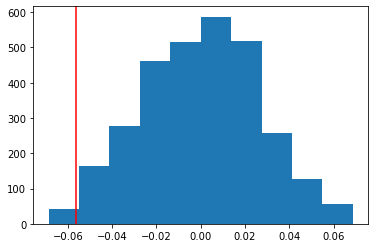

In [20]:
plt.figure()
plt.hist(null_vert_sim);
plt.axvline(orig_diff_mittel, color = 'r');

Dies ist die Verteilung von Mittelwert-Differenzen, welche wir erwarten würden, wenn die Nullhypothese wahr wäre. Wir wollen nun versuchen anhand dieser Verteilung und anhand der wahren Mittelwertdifferenz abzuschätzen, ob wir die Nullhypothese glauben können.

### Entscheidungen über die Nullhypothese (Nullhypothesen-Test)
Wie schon in der Vorlesung erklärt, gibt es keinen Grund die Nullhypothese als falsch einzustufen (zu verwerfen), wenn die originale, beobachtete Mittelwert-Differenz typisch für die simulierte Null-Verteilung ist, also weder 'zu klein', noch 'zu groß'.

Wie überführt man nun die unklaren Begriffe 'zu klein' und 'zu groß' in brauchbare Zahlen?
Kleine Werte liegen ja links in der Verteilung und nur wenige Werte sind noch kleiner, große Werte liegen rechts in der Verteilung und nur wenige Werte sind noch größer.

Für 'zu klein' (um noch typisch zu sein) können wir also auch sagen: 'Es sind nur sehr wenige Werte aus der Null_verteilung noch kleiner' und für 'zu groß' (um noch typisch zu sein) können wir sagen: Es sind nur sehr wenige Werte noch größer'.

Dazu könne wir erstmal festlegen, welche Grenzen wir für zu groß, bzw. zu klein haben wollen. Wir können zum Beispiel entscheiden, nur an die Nullhypothese glauben wollen, wenn mindestens 2.5% der Werte noch kleiner als unser beobachteter Wert sind und auch mindestens 2.5% noch größer sind. Unser beobachteter WErt ist dann in den Zentralen 95% der simulierten Null-Verteilung.

Wir müssen also lediglich das 2.5% und das 97.5%-Quantil (siehe letzte Übung bestimmen) und prüfen, ob unser beobachteter Wert dazwischen liegt.

In [21]:
alpha = 0.05 # (das sind 5%); mehr hierzu später
untere_prozent_grenze = alpha/2 # 2.5%
obere_prozent_grenze = 1-(alpha/2) # 97.5%
unteres_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[untere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())
oberes_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[obere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())

print(unteres_quantil)
print(oberes_quantil)

[-0.04375]
[0.04375]


Ist nun die beobachtete Differenz größer oder gleich dem unteren Quantil?

In [22]:
print(orig_diff_mittel  >= unteres_quantil)

[False]


Dies scheint NICHT der Fall zu sein.

Ist die beobachtete Differenz kleiner oder gleich dem oberen Quantil?

In [23]:
print(orig_diff_mittel  <= oberes_quantil)

[ True]


Das trifft hier zu.

da wir aber in der Richtung des unteren Quantils extremere Werte beobachtet haben, als Sie in den zentralen 95% der Nullverteilung vorkommen sollten, haben wir **einen Grund die Nullhypothese** gleicher Mittelwerte der genesungszeiten mit Medikament oder Placebo  **zu verwerfen**.

**AUFGABE: Denken Sie darüber nach, was Ihnen an der obigen Entscheidung über die Richtigkeit der Nullhypothese bekannt aus der letzten Übung und der Vorlesung 7 bekannt vorkommt.**

**AUFGABE: Wo gibt es Unterschiede zum Vorgehen in Übung/Vorlesung 7?** 

Wir können nun diese Logik in einen einzigen Befehl verpacken, um einen Permutationstest für die Nullhpyothese gleicher Mittelwerte **in gepaarten Stichproben** durchzuführen. dazu verwenden wir in der Zeile 3 unten, den gerade vorher definierten Befehl einfach gleich mit:

In [24]:
def permutationstest_gepaart_mittelwert(stichprobe_1, stichprobe_2, anz_permutationen, alpha):
    orig_diff_mittel = np.mean(stichprobe_1-stichprobe_2)
    null_vert_sim = simuliere_verteilung_gepaart_diff(stichprobe_1, stichprobe_2, anz_permutationen)
    untere_prozent_grenze = alpha/2 # 2.5%
    obere_prozent_grenze = 1-(alpha/2) # 97.5%
    unteres_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[untere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())
    oberes_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[obere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())
    
    print('originale Mittelwert-Differenz:')
    print(orig_diff_mittel)
    print('unteres Quantil:')
    print(unteres_quantil)
    print('oberes Quantil:')
    print(oberes_quantil)
    print('Originale Mittelwert-Differenz größer oder gleich unteres Quantil?')
    print(orig_diff_mittel  >= unteres_quantil)
    print('Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?')
    print(orig_diff_mittel  <= oberes_quantil)
    
    # das if, else Pärchen von Befehlen unten führt die  Befehle hinter 'if' aus,
    # wenn die Bedingung hinter 'if' wahr ist, und sonst die Befehle hinter 'else'
    if np.logical_and((orig_diff_mittel  >= unteres_quantil),(orig_diff_mittel  <= oberes_quantil)):
        print('Nullhpyothese sollte nicht verworfen werden.')
        return 0 # die Funktion gitb eine 0 aus, wenn die Nullhypothese nicht verworfen wird
    else:
        print('Nullhypothese sollte verworfen werden')
        return 1 # die Funktion gitb eine 1 aus, wenn die Nullhypothese nicht verworfen wird
    
                                            
                                            
                                            

In [28]:
# AUFGABE: Führen Sie den obigen Permutationstest für gepaarte Stichproben durch.
verworfen = 1 == permutationstest_gepaart_mittelwert(d_medizin, d_placebo, 3000, 0.05)

if verworfen:
    print('Nullhypothese wurde verworfen')

# AUFAGBE: Macht das Ergebnis Sinn, wenn Sie sich den obigen Linien-Plot nochmals anschauen?
# Begründen Sie Ihre Meinung.

# AUFGABE: Berechnen sie noch mals die Mittelwertdifferenz, sowie die Stsandardabweichung der
# Stichprobe mit Placebo und der Stichprobe mit Medizin. Ist die Mittelwertdifferenz groß oder klein
# im Vergleich zu diesen Standardabweichungen?

originale Mittelwert-Differenz:
-0.05624999999999992
unteres Quantil:
[-0.04375]
oberes Quantil:
[0.04375]
Originale Mittelwert-Differenz größer oder gleich unteres Quantil?
[False]
Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?
[ True]
Nullhypothese sollte verworfen werden
Nullhypothese wurde verworfen


In [ ]:
# AUFGABE: Benutzen Sie nur zum Vergleich einmal den Test-befehl aus der letzten Vorlesung für ungepaarte Stichproben
# (ACHTUNG: Das ist eigentlich FALSCH!)
# dieser Befehl wirft alle meßwerte auch zwischen den Spacats durcheinander 
# Öffnen Sie hierzu nochmals Übung 7 und kopieren Sie beiden benötigten Befehlsdefinitionen
# hierher, führen Sie dann diese Zelle aus, und machen Sie anschließend den Test für ungepaarte Stichproben
# Was passiert? Und warum?

In [ ]:
def simuliere_verteilung_diff(stichprobe_1, stichprobe_2, anz_permutationen):
    diff_orig = np.mean(stichprobe_1) - np.mean(stichprobe_2)
    verteilung_diff_sim = np.full(anz_permutationen+1, np.nan) # ein Element mehr für den originalen Wert (!)
    stichprobe_gesamt = np.hstack([stichprobe_1, stichprobe_2])
    anz_stichprobe_1 = np.size(stichprobe_1)
    anz_stichprobe_2 = np.size(stichprobe_2)
    anz_stichprobe_gesamt = anz_stichprobe_1 + anz_stichprobe_2
    for perm in range(0, anz_permutationen):
        # wichtig: in jedem Durchlauf der for-loop passiert hier auf's neue etwas zufälliges
        stichprobe_gesamt_permuted = np.random.permutation(stichprobe_gesamt)
        stichprobe_1_sim = stichprobe_gesamt_permuted[0:anz_stichprobe_1]
        stichprobe_2_sim = stichprobe_gesamt_permuted[anz_stichprobe_1:anz_stichprobe_gesamt]
        mittelw_sim_1 = np.mean(stichprobe_1_sim)
        mittelw_sim_2 = np.mean(stichprobe_2_sim)
        diff_sim = mittelw_sim_1 - mittelw_sim_2
        verteilung_diff_sim[perm] = diff_sim
        
    verteilung_diff_sim[perm+1] = diff_orig
    
    return verteilung_diff_sim

def permutationstest_unverbunden_mittelwert(stichprobe_1, stichprobe_2, anz_permutationen, alpha):
    orig_diff_mittel = np.mean(stichprobe_1)-np.mean(stichprobe_2)
    null_vert_sim = simuliere_verteilung_diff(stichprobe_1, stichprobe_2, anz_permutationen)
    untere_prozent_grenze = alpha/2 # 2.5%
    obere_prozent_grenze = 1-(alpha/2) # 97.5%
    unteres_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[untere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())
    oberes_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[obere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())
    
    print('originale Mittelwert-Differenz:')
    print(orig_diff_mittel)
    print('unteres Quantil:')
    print(unteres_quantil)
    print('oberes Quantil:')
    print(oberes_quantil)
    print('Originale Mittelwert-Differenz größer oder gleich unteres Quantil?')
    print(orig_diff_mittel  >= unteres_quantil)
    print('Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?')
    print(orig_diff_mittel  <= oberes_quantil)
    
    # das if, else Pärchen von Befehlen unten führt die  Befehle hinter 'if' aus,
    # wenn die Bedingung hinter 'if' wahr ist, und sonst die Befehle hinter 'else'
    if np.logical_and((orig_diff_mittel  >= unteres_quantil),(orig_diff_mittel  <= oberes_quantil)):
        print('Nullhpyothese sollte NICHT verworfen werden.')
        return 0 # die Funktion gitb eine 0 aus, wenn die Nullhypothese nicht verworfen wird
    else:
        print('Nullhypothese sollte verworfen werden')
        return 1 # die Funktion gitb eine 1 aus, wenn die Nullhypothese nicht verworfen wird
    

permutationstest_unverbunden_mittelwert(d_placebo, d_medizin,2000, 0.05)